<a href="https://colab.research.google.com/github/nioke-dev/PCVK_Genap_2024/blob/main/week9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

(<Axes: title={'center': 'Citra Hasil Dilasi'}>,
 Text(0.5, 1.0, 'Citra Hasil Dilasi'))

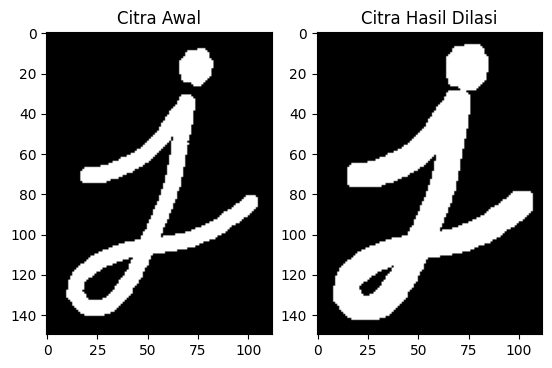

In [6]:
# 3. Buatlah fungsi dilasi serta tampilkan hasil dilasi pada citra dengan Structuring Element Dilasi (SED) berbentuk square 5 x 5
# tanpa menggunakan library morphology dari openCV

img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/j.png')

kernel = np.ones((5,5), np.uint8) # fungsi ones adalah untuk Membuat array dengan nilai 1, uint8 (unsigned integer 8 bit) merupakan tipe data yg digunakan untuk membuat gambar dengan menggunakan filter RGB dengan pixel dalam range [0,255].
dilation = cv2.dilate(img, kernel, iterations = 1) #iterator objek yang dapat diulangi, artinya Anda dapat melintasi semua nilai.

plt.subplot(121),plt.imshow(img),plt.title('Citra Awal') #fungsi subplots() kita bisa menggambar banyak plot dalam satu gambar.
plt.subplot(122),plt.imshow(dilation),plt.title('Citra Hasil Dilasi')

(<Axes: title={'center': 'Citra Hasil Erosi'}>,
 Text(0.5, 1.0, 'Citra Hasil Erosi'))

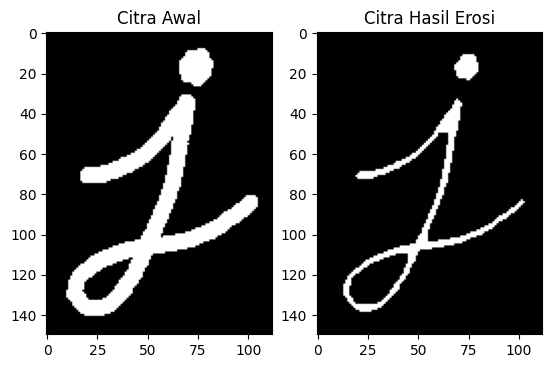

In [7]:
# 4. fungsi erosi serta tampilkan hasil erosi pada citra dengan Structuring Element Erosi (SE) berbentuk square 5 x 5
# tanpa menggunakan library morphology dari openCV

kernel = np.ones((5,5), np.uint8)
erosion = cv2.erode(img, kernel, iterations = 1)

plt.subplot(121), plt.imshow(img), plt.title('Citra Awal')
plt.subplot(122), plt.imshow(erosion), plt.title('Citra Hasil Erosi')

(<Axes: title={'center': 'Citra Hasil Dilasi'}>,
 Text(0.5, 1.0, 'Citra Hasil Dilasi'))

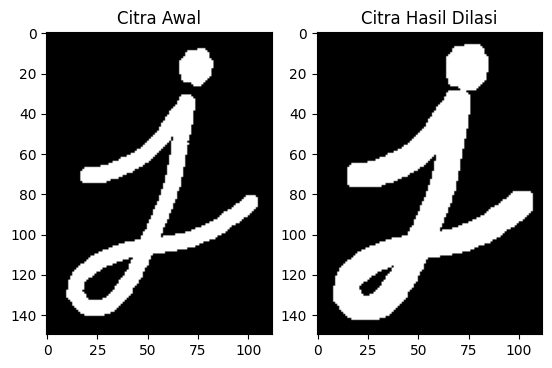

In [8]:
# 5. implementasi operasi dilasi Structuring Element Dilasi (SED) berbentuk square 5 x 5
# dengan menggunakan library morphology dari openCV

kernel = np.ones((5,5), np.uint8)
dilation = cv2.morphologyEx(img, cv2.MORPH_DILATE, kernel) #morphologyEX berfungsi untuk menghilangkan noise,

plt.subplot(121), plt.imshow(img), plt.title('Citra Awal')
plt.subplot(122), plt.imshow(dilation), plt.title('Citra Hasil Dilasi')

(<Axes: title={'center': 'Citra Hasil Erosi'}>,
 Text(0.5, 1.0, 'Citra Hasil Erosi'))

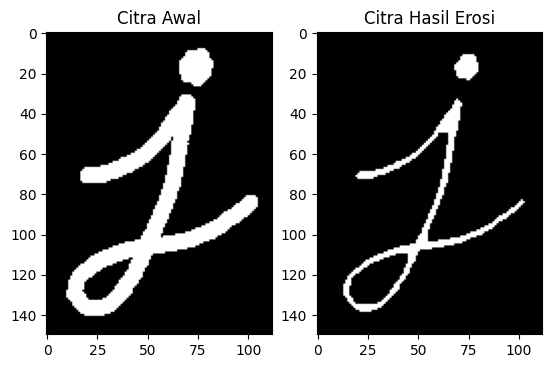

In [9]:
# 6. implementasi operasi dilasi Structuring Element Erosi (SE) berbentuk square 5 x 5
# dengan menggunakan library morphology dari openCV

kernel = np.ones((5,5), np.uint8)
erosion = cv2.morphologyEx(img, cv2.MORPH_ERODE, kernel)

plt.subplot(121), plt.imshow(img), plt.title('Citra Awal')
plt.subplot(122), plt.imshow(erosion), plt.title('Citra Hasil Erosi')

<ipython-input-10-689188943248>:52: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(131),plt.imshow(img7, cmap="gray"),plt.title('Citra Awal')


(<Axes: title={'center': 'Citra Hasil Dilasi'}>,
 Text(0.5, 1.0, 'Citra Hasil Dilasi'))

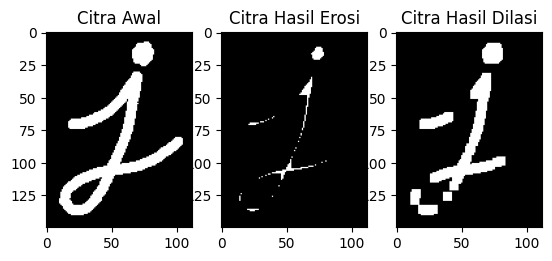

In [10]:
# 7. program implementasi operasi opening dengan Structuring Element berbentuk square 7 x 7
# tanpa menggunakan library morphology dari openCV

# Membaca image untuk operasi erosi
img7 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/j.png', 0)

#Acquire size of the image
m, n = img7.shape

#Show the image
plt.imshow(img7, cmap="gray")

# Define the structuring element
# k= 11,15,45 -Different sizes of the structuring element
k = 7
SE = np.ones((k,k), dtype=np.uint8)
constant = (k-1)//2

#Define new image
imgErode = np.zeros((m,n), dtype=np.uint8)

#Erosion without using inbuilt cv2 function for morphology
for i in range(constant, m-constant): #constant adalah tipe variable yang nilainya tidak dapat diubah
  for j in range(constant,n-constant):
    temp = img7[i-constant:i+constant+1, j-constant:j+constant+1] #temp digunakan untuk menampung atau menyimpan data untuk sementara
    product = temp * SE
    imgErode[i,j] = np.min(product)

#Read the image for dilation
img7_2 = imgErode

#Acquire size of the image
p, q= img7_2.shape

#Show the image
plt.imshow(img7_2, cmap="gray")

#Define new image to store the pixels of dilated image
imgDilate = np.zeros((p,q), dtype=np.uint8)

#Define the structuring element
SED = np.array([[1,1,1,1,1,1,1], [1,1,1,1,1,1,1], [1,1,1,1,1,1,1], [1,1,1,1,1,1,1], [1,1,1,1,1,1,1], [1,1,1,1,1,1,1], [1,1,1,1,1,1,1]])
constant1 = 3

#Dilation operation without using inbuilt cv2 function
for i in range(constant1, p-constant1):
  for j in range(constant1,q-constant1):
    temp = img7_2[i-constant1:i+constant1+1, j-constant1:j+constant1+1]
    product = temp * SED
    imgDilate[i,j] = np.max(product)

plt.subplot(131),plt.imshow(img7, cmap="gray"),plt.title('Citra Awal')
plt.subplot(132),plt.imshow(imgErode, cmap="gray"),plt.title('Citra Hasil Erosi')
plt.subplot(133),plt.imshow(imgDilate, cmap="gray"),plt.title('Citra Hasil Dilasi')

(<Axes: title={'center': 'Citra Hasil Opening'}>,
 Text(0.5, 1.0, 'Citra Hasil Opening'))

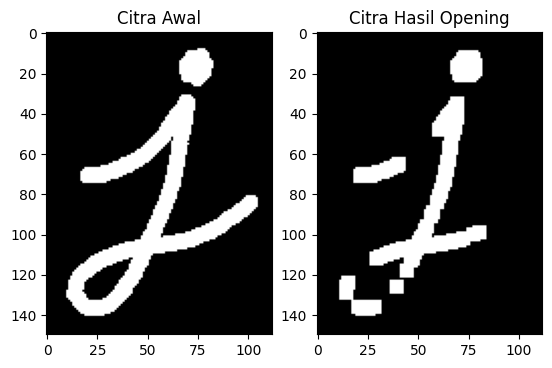

In [11]:
# 7. program implementasi operasi opening dengan Structuring Element berbentuk square 7 x 7
# dengan menggunakan library morphology dari openCV

kernel = np.ones((7,7), np.uint8)
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)

plt.subplot(121), plt.imshow(img), plt.title('Citra Awal')
plt.subplot(122), plt.imshow(opening), plt.title('Citra Hasil Opening')

<ipython-input-12-6903de6c8114>:52: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(131),plt.imshow(img8, cmap="gray"),plt.title('Citra Awal')


(<Axes: title={'center': 'Citra Hasil Erosi'}>,
 Text(0.5, 1.0, 'Citra Hasil Erosi'))

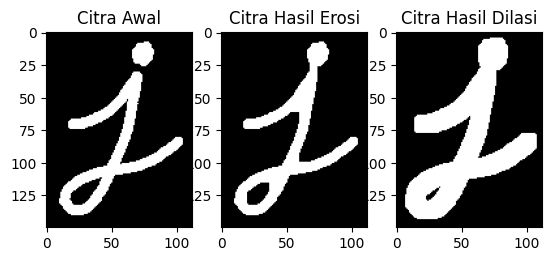

In [12]:
# 8. implementasi operasi closing dengan Structuring Element berbentuk square 7 x 7
# tanpa menggunakan library morphology dari openCV

#Read the image for dilation
img8 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/j.png', 0)

#Acquire size of the image
p, q = img8.shape

#Show the image
plt.imshow(img8, cmap="gray")

#Define new image to store the pixels of dilated image
imgDilate = np.zeros((p,q), dtype=np.uint8)

#Define the structuring element
SED = np.array([[1,1,1,1,1,1,1], [1,1,1,1,1,1,1], [1,1,1,1,1,1,1], [1,1,1,1,1,1,1], [1,1,1,1,1,1,1], [1,1,1,1,1,1,1], [1,1,1,1,1,1,1]])
constant1 = 3

#Dilation operation without using inbuilt CV2 function
for i in range(constant1, p-constant1):
  for j in range(constant1,q-constant1):
    temp = img8[i-constant1:i+constant1+1, j-constant1:j+constant1+1]
    product = temp * SED
    imgDilate[i,j] = np.max(product)

#Read the image for erosion
img8_2 = imgDilate

#Acquire size of the image
m, n= img8_2.shape

#Show the image
plt.imshow(img8_2, cmap="gray")

# Define the structuring element
# k= 11,15,45 -Different sizes of the structuring element
k = 7
SE = np.ones((k,k), dtype=np.uint8)
constant = (k-1)//2

#Define new image
imgErode = np.zeros((m,n), dtype=np.uint8)

#Erosion without using inbuilt cv2 function for morphology
for i in range(constant, m-constant):
  for j in range(constant,n-constant):
    temp = img8_2[i-constant:i+constant+1, j-constant:j+constant+1]
    product = temp * SE
    imgErode[i,j] = np.min(product)

plt.subplot(131),plt.imshow(img8, cmap="gray"),plt.title('Citra Awal')
plt.subplot(133),plt.imshow(imgDilate, cmap="gray"),plt.title('Citra Hasil Dilasi')
plt.subplot(132),plt.imshow(imgErode, cmap="gray"),plt.title('Citra Hasil Erosi')

(<Axes: title={'center': 'Citra Hasil Closing'}>,
 Text(0.5, 1.0, 'Citra Hasil Closing'))

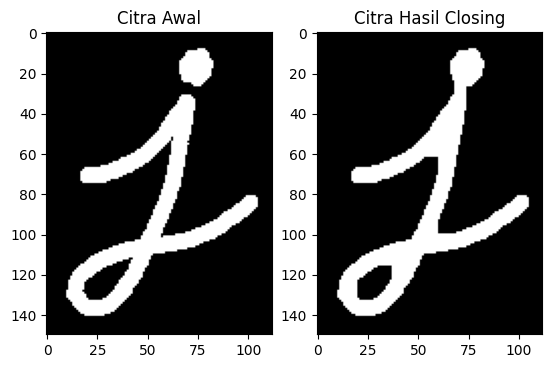

In [13]:
# 8. implementasi operasi closing dengan Structuring Element berbentuk square 7 x 7
# dengan menggunakan library morphology dari openCV

kernel = np.ones((7,7), np.uint8)
closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)

plt.subplot(121), plt.imshow(img), plt.title('Citra Awal')
plt.subplot(122), plt.imshow(closing), plt.title('Citra Hasil Closing')

SED = Cross 3


(<Axes: title={'center': 'Citra Hasil Dilasi'}>,
 Text(0.5, 1.0, 'Citra Hasil Dilasi'))

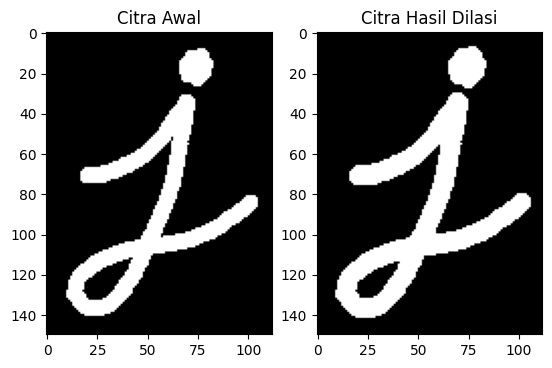

In [14]:
# 9. implementasi operasi dilasi dengan Structuring Element berbentuk Cross 3 x 3

kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))
dilation = cv2.dilate(img, kernel, iterations = 1)

print("SED = Cross 3")

plt.subplot(121),plt.imshow(img),plt.title('Citra Awal')
plt.subplot(122),plt.imshow(dilation),plt.title('Citra Hasil Dilasi')

SED = Cross 5


(<Axes: title={'center': 'Citra Hasil Dilasi'}>,
 Text(0.5, 1.0, 'Citra Hasil Dilasi'))

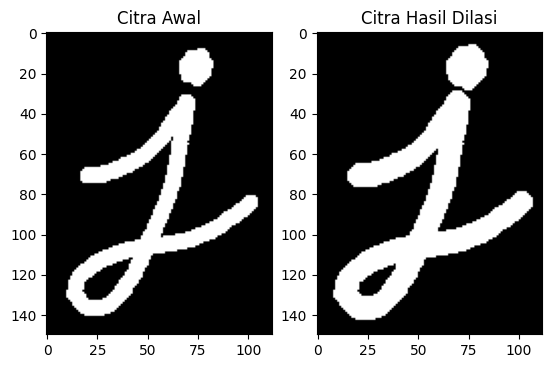

In [15]:
# 9. implementasi operasi dilasi dengan Structuring Element berbentuk Cross 5 x 5

kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(5,5))
dilation = cv2.dilate(img, kernel, iterations = 1)

print("SED = Cross 5")

plt.subplot(121),plt.imshow(img),plt.title('Citra Awal')
plt.subplot(122),plt.imshow(dilation),plt.title('Citra Hasil Dilasi')

SED = Circle 3


(<Axes: title={'center': 'Citra Hasil Dilasi'}>,
 Text(0.5, 1.0, 'Citra Hasil Dilasi'))

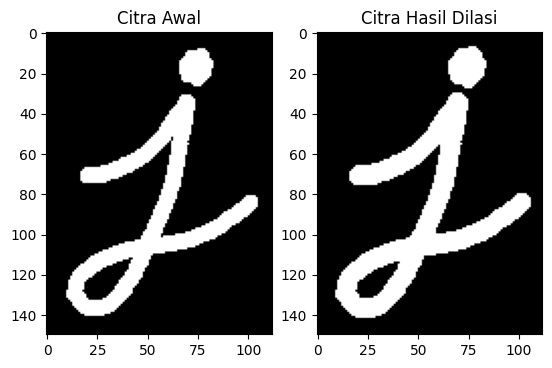

In [16]:
# 10. implementasi operasi dilasi dengan Structuring Element berbentuk Circular 3 x 3

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
dilation = cv2.dilate(img, kernel, iterations = 1)

print("SED = Circle 3")

plt.subplot(121),plt.imshow(img),plt.title('Citra Awal')
plt.subplot(122),plt.imshow(dilation),plt.title('Citra Hasil Dilasi')

SED = Circle 5


(<Axes: title={'center': 'Citra Hasil Dilasi'}>,
 Text(0.5, 1.0, 'Citra Hasil Dilasi'))

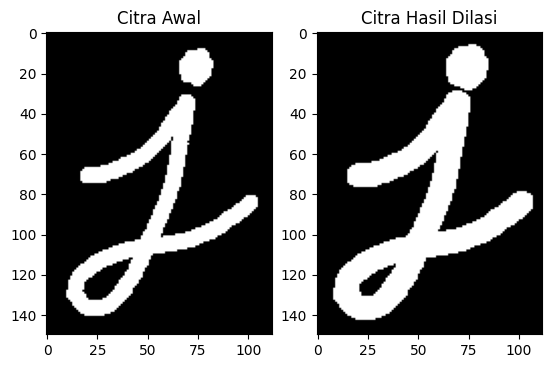

In [17]:
# 10. implementasi operasi dilasi dengan Structuring Element berbentuk Circular 5 x 5

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
dilation = cv2.dilate(img, kernel, iterations = 1)

print("SED = Circle 5")

plt.subplot(121),plt.imshow(img),plt.title('Citra Awal')
plt.subplot(122),plt.imshow(dilation),plt.title('Citra Hasil Dilasi')

SE = Rectangle 3x5


(<Axes: title={'center': 'Citra Hasil Erosi'}>,
 Text(0.5, 1.0, 'Citra Hasil Erosi'))

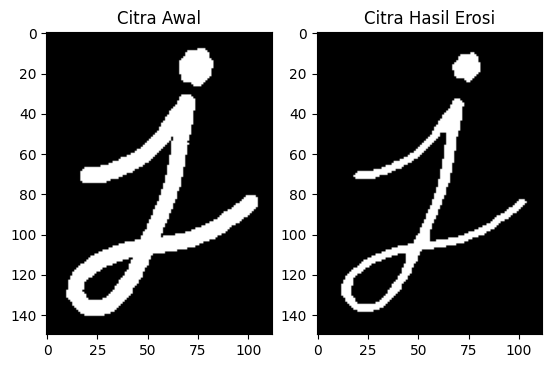

In [18]:
# 11. implementasi operasi erosi dengan Structuring Element berbentuk Rectangle 3 x 5

kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(3,5))
erosion = cv2.erode(img, kernel, iterations = 1)

print("SE = Rectangle 3x5")

plt.subplot(121), plt.imshow(img), plt.title('Citra Awal')
plt.subplot(122), plt.imshow(erosion), plt.title('Citra Hasil Erosi')

SE = Rectangle 5x7


(<Axes: title={'center': 'Citra Hasil Erosi'}>,
 Text(0.5, 1.0, 'Citra Hasil Erosi'))

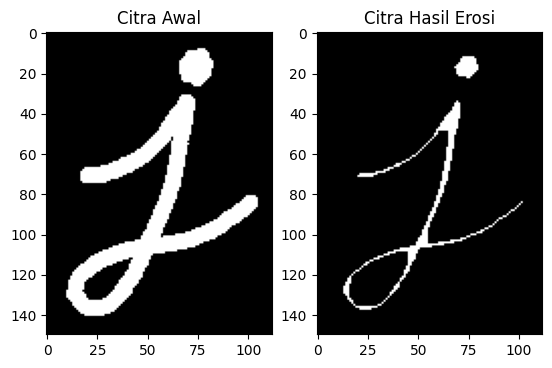

In [19]:
# 11. implementasi operasi erosi dengan Structuring Element berbentuk Rectangle 5 x 7

kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(5,7))
erosion = cv2.erode(img, kernel, iterations = 1)

print("SE = Rectangle 5x7")

plt.subplot(121), plt.imshow(img), plt.title('Citra Awal')
plt.subplot(122), plt.imshow(erosion), plt.title('Citra Hasil Erosi')

SE = Line Vertikal 3


(<Axes: title={'center': 'Citra Hasil Erosi'}>,
 Text(0.5, 1.0, 'Citra Hasil Erosi'))

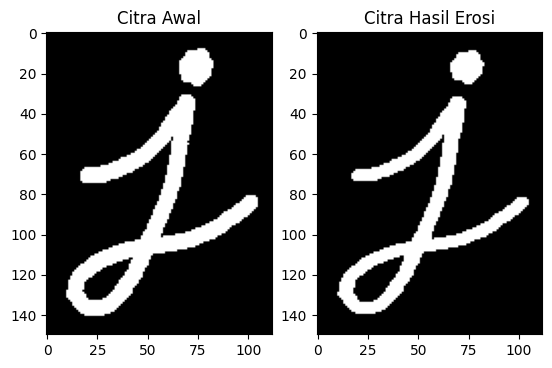

In [20]:
# 12. implementasi operasi erosi dengan Structuring Element berbentuk Line Vertikal 3

kernel = np.ones((3,1),np.uint8)
erosion = cv2.morphologyEx(img, cv2.MORPH_ERODE, kernel)

print("SE = Line Vertikal 3")

plt.subplot(121), plt.imshow(img), plt.title('Citra Awal')
plt.subplot(122), plt.imshow(erosion), plt.title('Citra Hasil Erosi')

SE = Line Vertikal 5


(<Axes: title={'center': 'Citra Hasil Erosi'}>,
 Text(0.5, 1.0, 'Citra Hasil Erosi'))

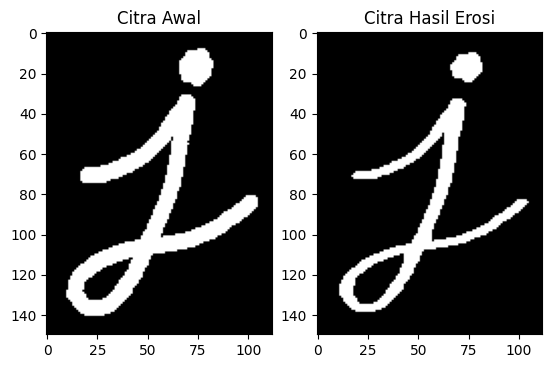

In [21]:
# 12. implementasi operasi erosi dengan Structuring Element berbentuk Line Vertikal 5
# Nama : Muhammad Nurul Mustofa
# Nim : 2241720022

kernel = np.ones((5,1),np.uint8)
erosion = cv2.morphologyEx(img, cv2.MORPH_ERODE, kernel)

print("SE = Line Vertikal 5")

plt.subplot(121), plt.imshow(img), plt.title('Citra Awal')
plt.subplot(122), plt.imshow(erosion), plt.title('Citra Hasil Erosi')